# STAT 159 Final Project - Group 22

## Analysis of Building Energy Management

**Research Question**: How is the energy consumption of the building influenced by various factors?

**Authors**: Aoyu, Emma, Hamsa, Reuel

## Introduction 

Buildings consume approximately 40% of the primary energy in the United States. Today’s technologies (e.g., energy efficiency, sensors, and advanced controls) could reduce energy use in buildings by up to 50%. However, reducing energy waste in buildings and optimizing building operations is not a simple problem to mitigate. There are many different factors (i.e. CO2 emissions, occupancy, outdoor temperature, indoor air)  that play a role in energy consumption. We are interested in exploring if certain factors play a much bigger role in energy consumption and if our analysis can lead us to any revelations on which factors should be focused on first in an attempt to reduce energy consumption. 

The target building of this dataset is a medium-sized building (Wang Hall) located inside the Lawrence Berkeley National Laboratory campus in Berkeley, CA. The building has 10,400 m^2 of conditioned spaces on four floors.The purpose of analyzing the energy management of Wang Hall is to determine the correlation between energy consumption and various factors, such as occupancy and outdoor temperature. 

In order to investigate this question, we will be narrowing our analyses to one variable at a time. Meaning, we will be independently looking at how energy usage is affected by CO2 emissions, occupancy, outdoor temperature, and indoor air. 

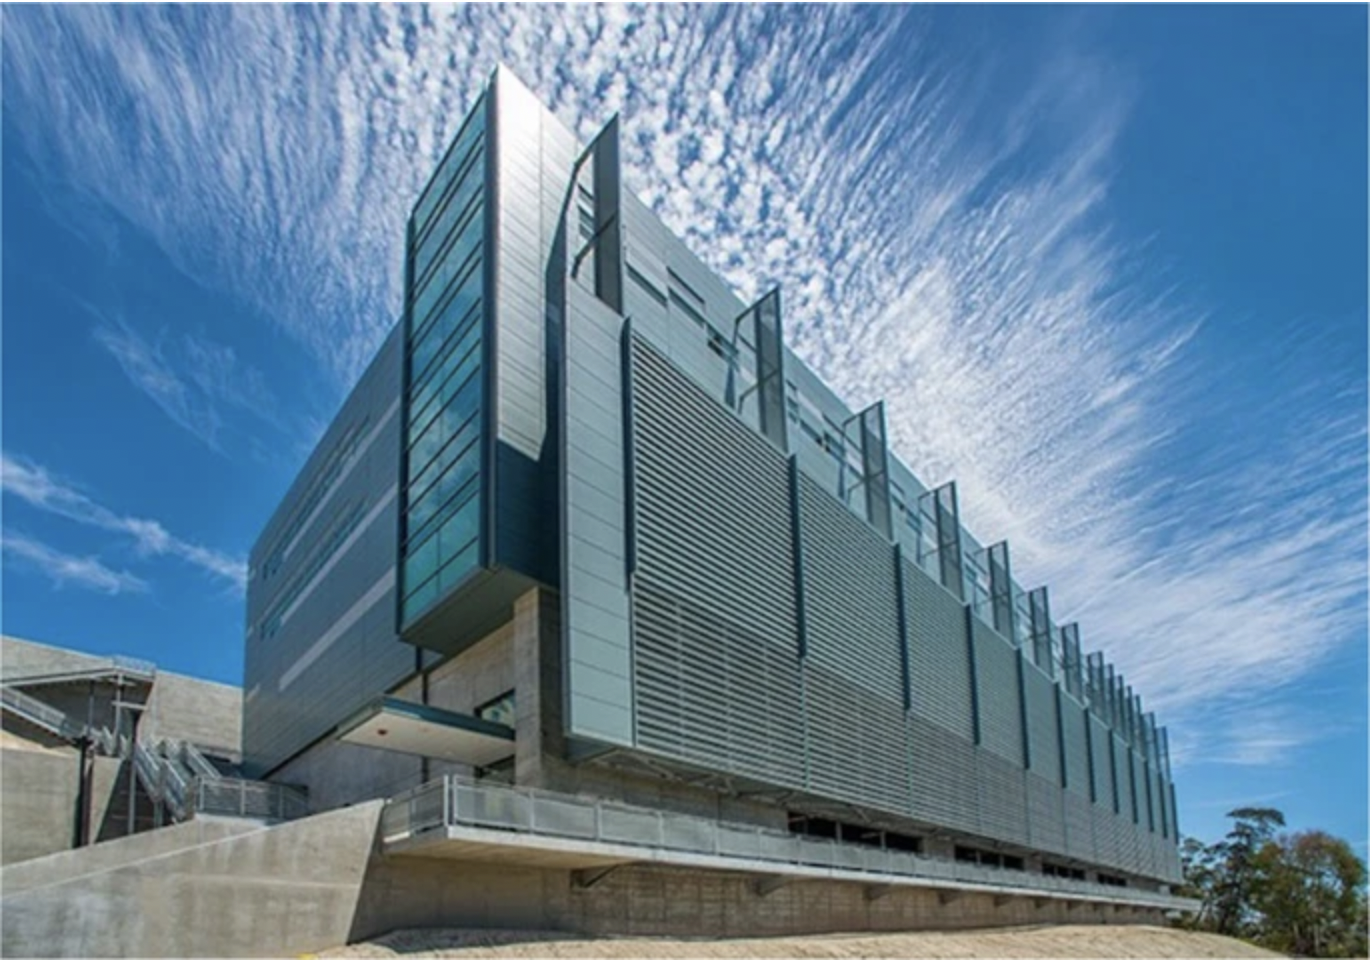

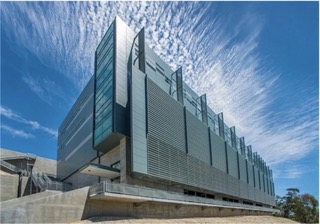

Wang Hall in Berkeley, CA

In [12]:
import os
import glob
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

## Analysis

**C02 Emissions Hourly**

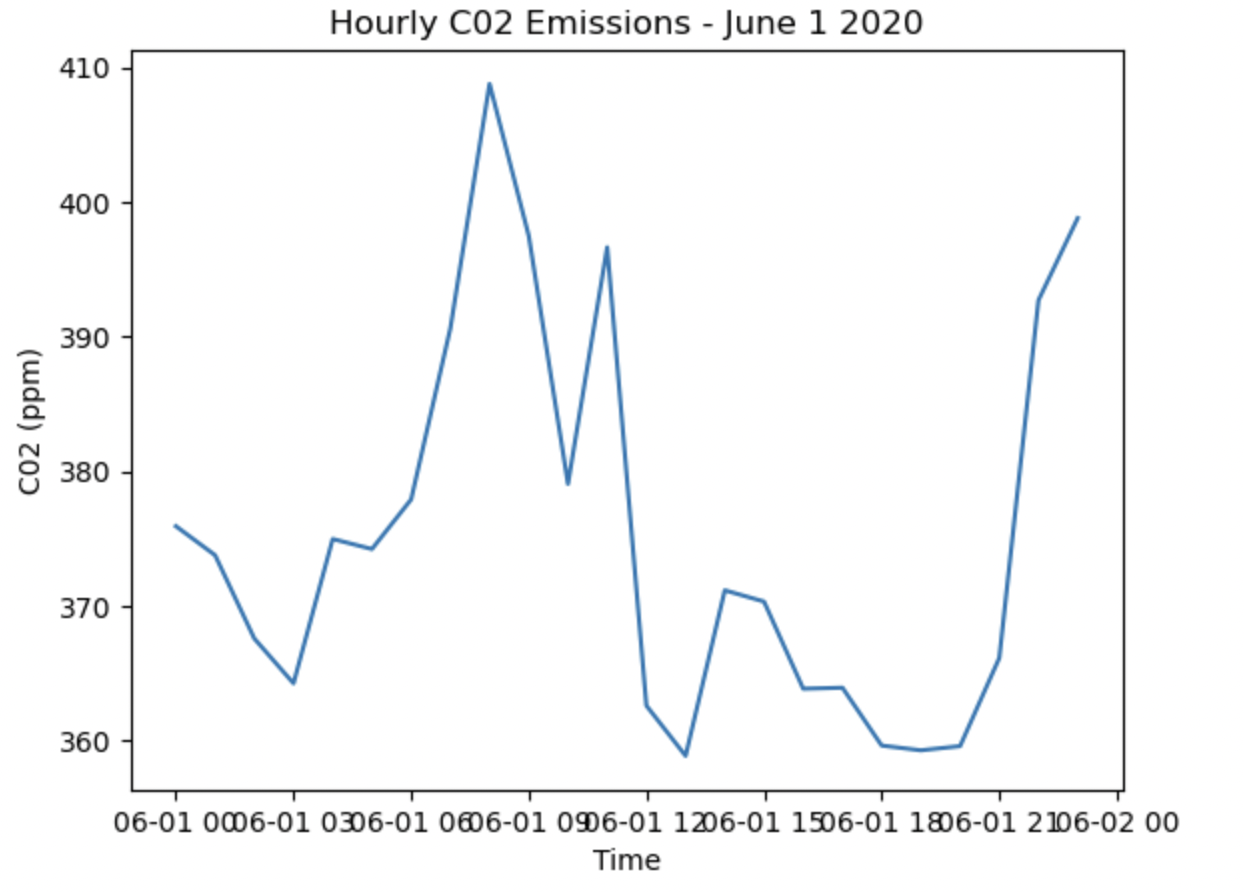

In [13]:
from IPython import display
display.Image("images/hourlyc02_june1.jpg", width=500)

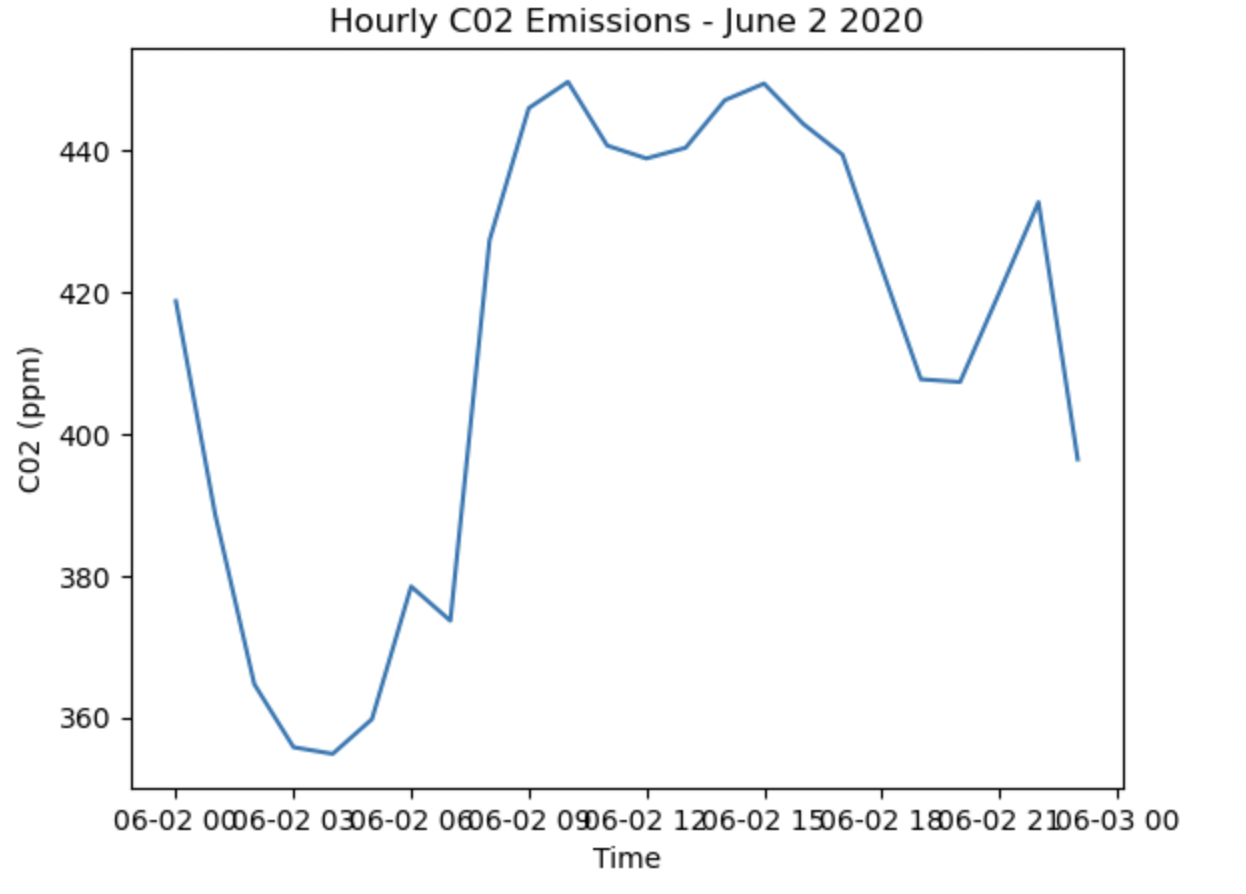

In [14]:
display.Image("images/hourlyc02_june2.jpg", width=500)

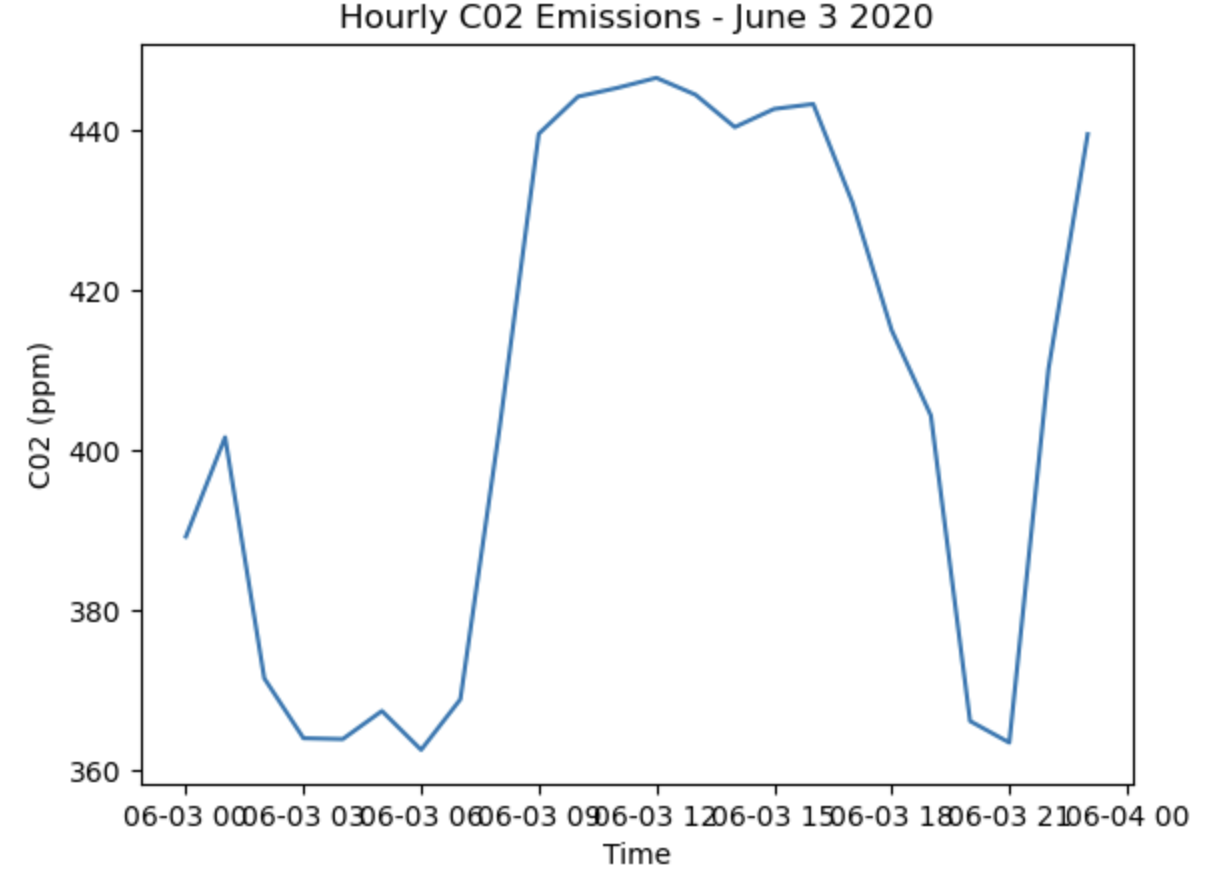

In [15]:
display.Image("images/hourlyc02_june3.jpg", width=500)

In these figures we can observe that in the summertime, as seen in the visualization of the co2 levels throughout the days of June 1, 2, and 3 there is a maximum in the c02 levels around mid-day to afternoon and it stays at the peak c02 levels throughout this time. This may be due to the relationship between temperature and c02 levels, where higher temperatures are related to higher co2 levels. It can also be the case that because of more extreme temperatures in the middle of the day to afternoon, more energy is used to cool the building, leading to higher c02 emissions. 

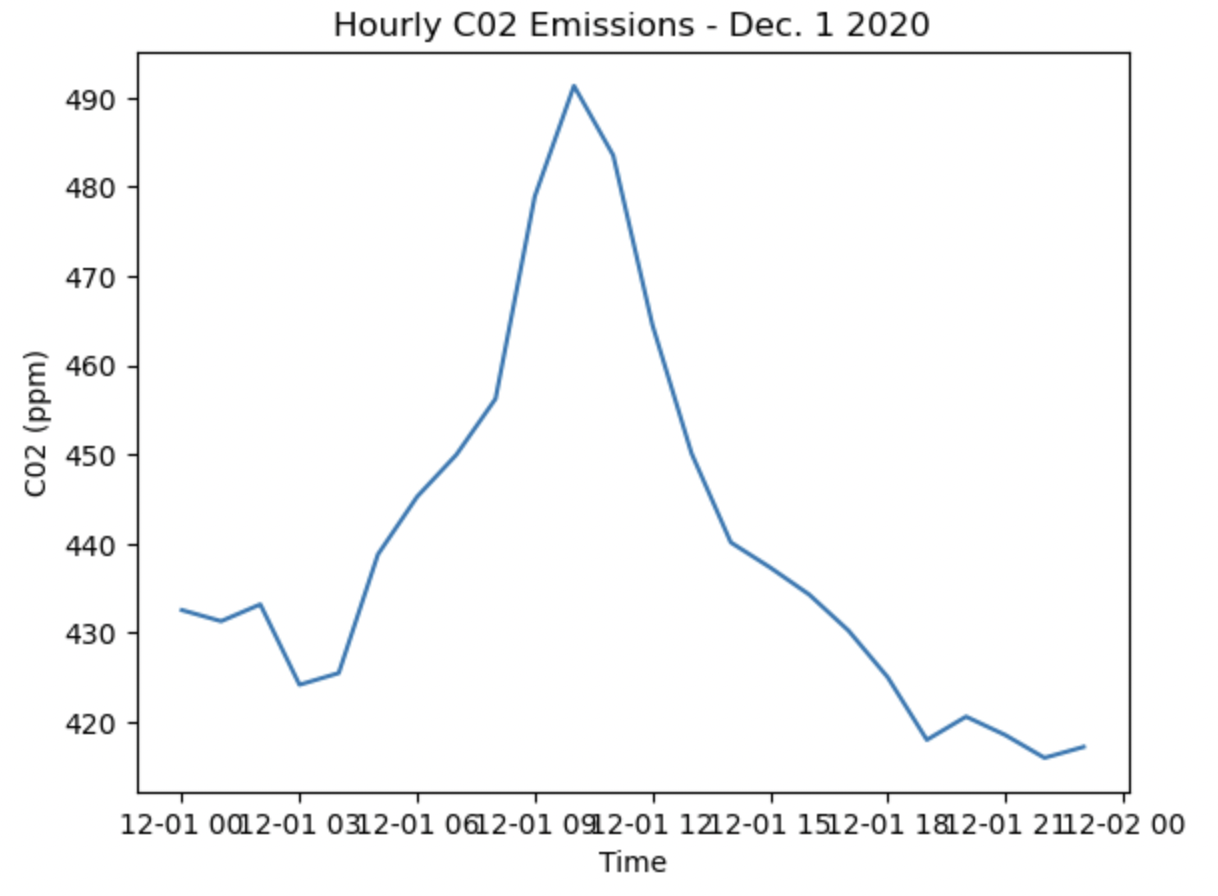

In [16]:
display.Image("images/hourlyc02_dec1.jpg", width=500)

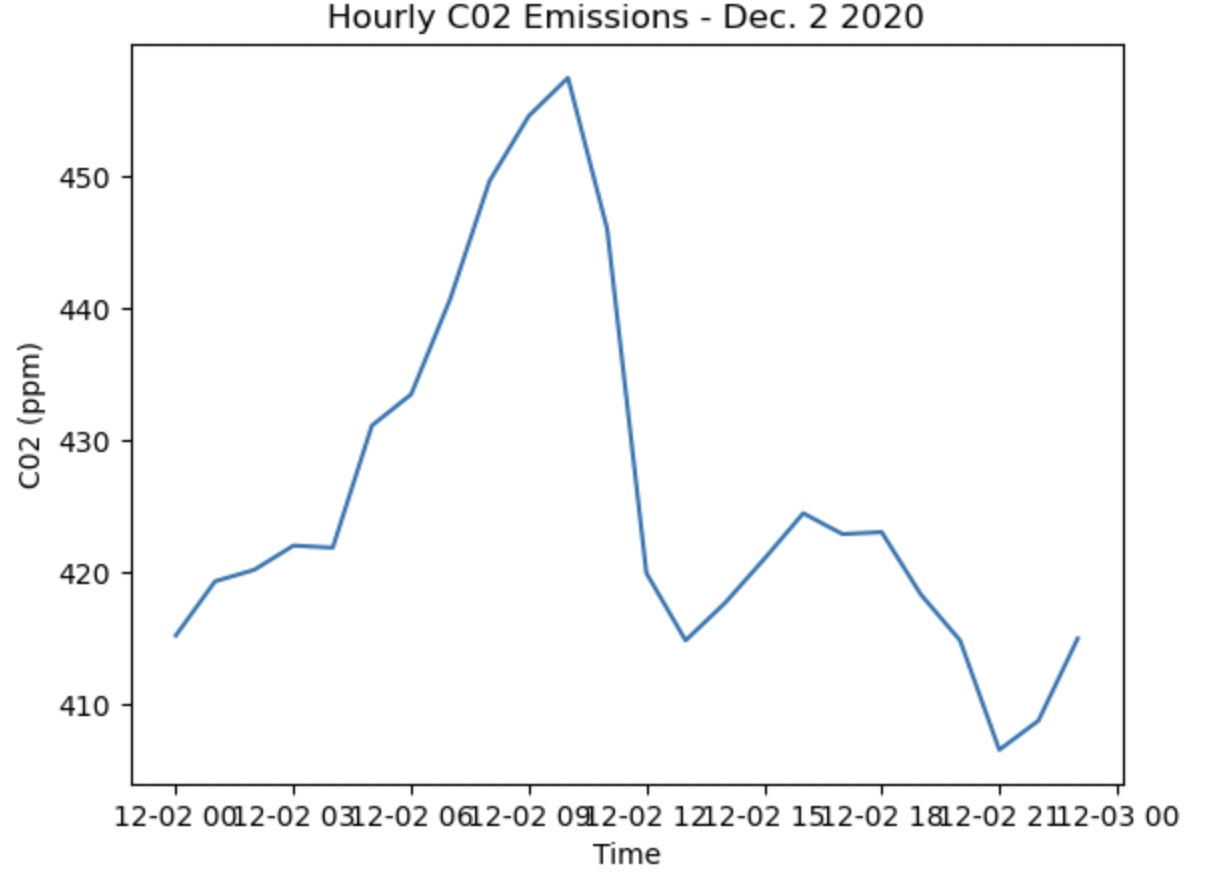

In [17]:
display.Image("images/hourlyc02_dec2.jpg", width=500)

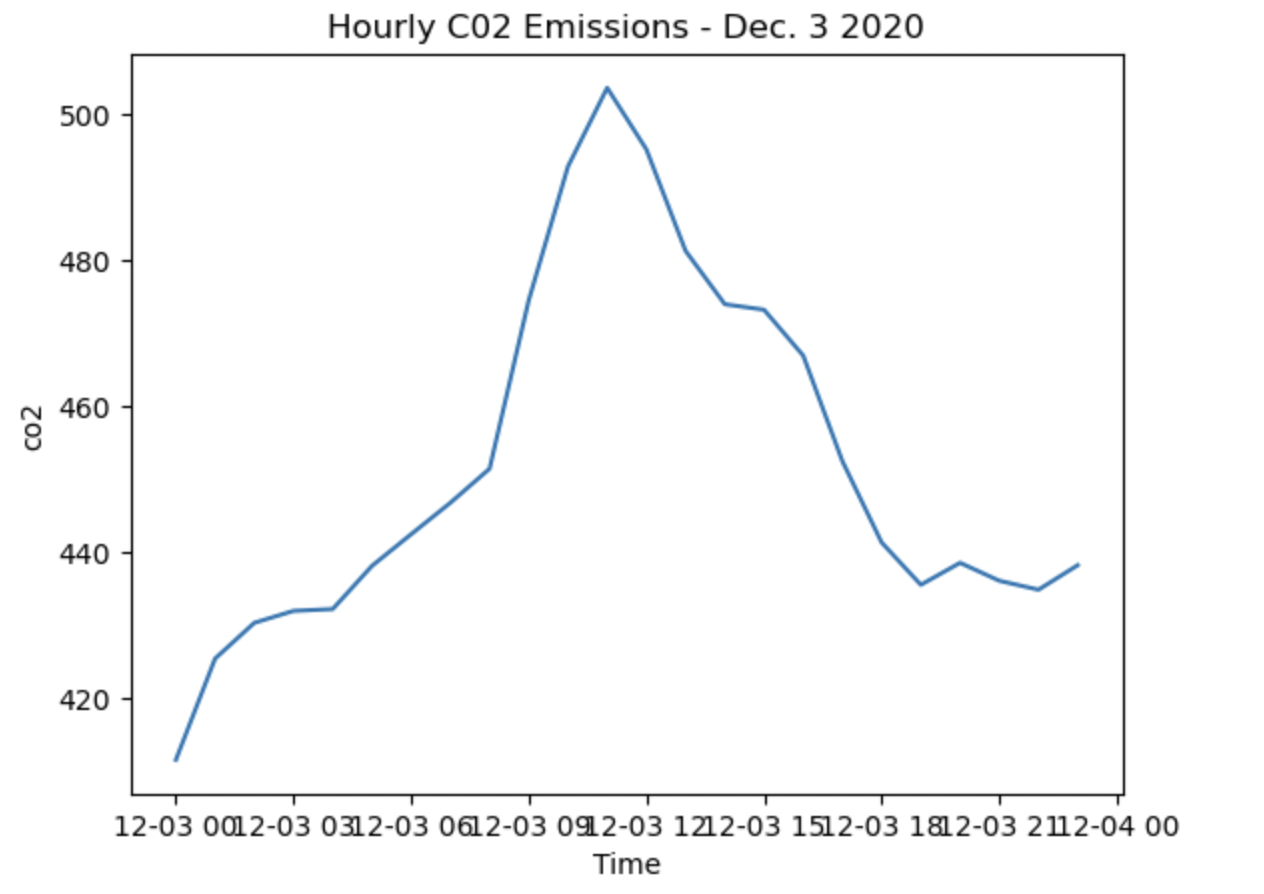

In [18]:
display.Image("images/hourlyc02_dec3.jpg", width=500)

On the contrary, we can observe that during the winter in December 1, 2, and 3, there is a singular peak of co2 levels that occurs around mid-day. This might be the case that during the day, the most energy is used in the building, but only for a shorter period of time compared to the summer. This is a reasonable explanation taking into account the climate of Berkeley, where summers can get very hot and require the use of air-conditioning, while in the winter temperatures are generally cooler and don't need air-conditioning indoors. 

To conduct this analysis, we first imported the dataset, made the date variable hourly, and extracted the c02 levels of each hour of the day to create the visualizations using matplotlib. To conduct a more comprehensive analysis of the c02 levels throughout the day, it would be best to compare the trend for all days of the year, even across multiple years. This would help find out if there are any anomalies or outliers that should be considered when looking at patterns. It is also not clear just from this analysis what exactly causes the differing c02 emission levels throughout the day and may be due to several different factors. 

**Comparing co2 emission to interior temperature** 

We also wanted to observe if interior temperature of the building had any impact on the carbon emission. We suspected that by observing the interior temperature of the building, we can see if the usage of air conditioning could have had any influence on the building's carbon emission. To do so, we extracted the data for carbon emission and interior temperature of the building and took the average of all the hourly data to compare them side by side.

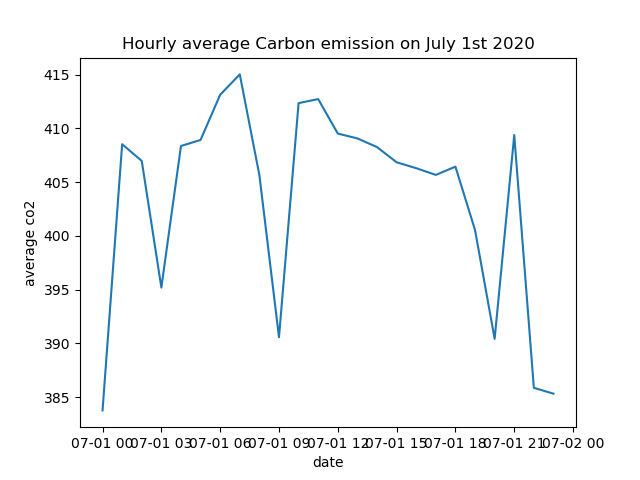

In [25]:
display.Image("images/hourly-july1st_co2.png", width=500)

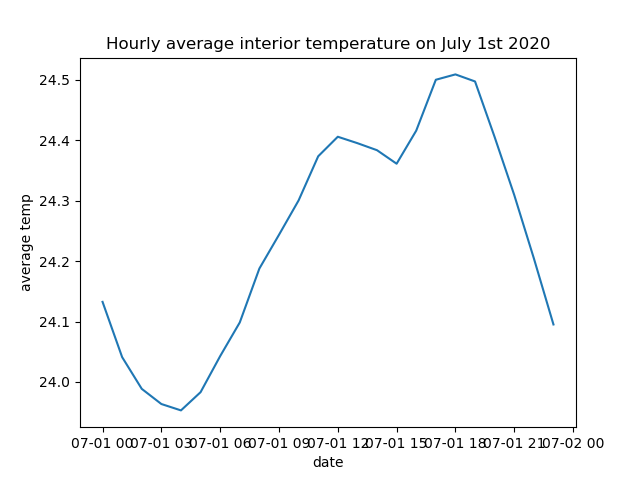

In [26]:
display.Image("images/hourly-july1st interior temp.png", width=500)

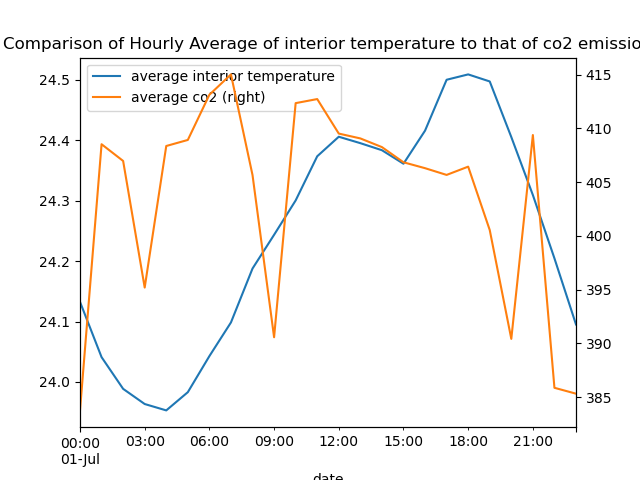

In [27]:
display.Image("images/co2 vs int-temp.png", width=500)

The plot doesn't seem to show any big correlation between the average interior temperature and the average co2 emission. We decided to compare these two factors because we assumed that the increase or decrease of interior temperature meant the usage of air conditioning inside the building. However, we were not able to reach the conclusion that we had hoped to make from the data upon plotting them. This graph shows that either the building relies on other resources that aren't air conditioning (that emit little co2) to maintain interior temperature or that the building's air conditioning system emits co2 that is comparably negligible to other sources of the building that emit co2. Also, another factor that caught our attention that could have contributed to this non-correlation of data could have been the fact that 2020 was the year of covid outbreak that caused most, if not all, in-person activities to stop, which could have affected the building's usage of air conditioning. We tried to look for more data outside of the year 2020 but the data for carbon emission was only available for the year 2020.

**Occupancy level and outdoor weather impact on energy consumption**

In order to explore how occupancy level and outdoor weather influence energy consumption of the selected site, we narrow down the research scope to cooling season around August. According to the air conditioning mechanical system design, cooling energy is mostly provided through the a water-cooled direct expansion (DX) coils from rooftop units, which then supplies cool air to the underfloor plenums. Therefore, we define the time interval of the analysis to be from 2018-08-10 to 2018-08-17.

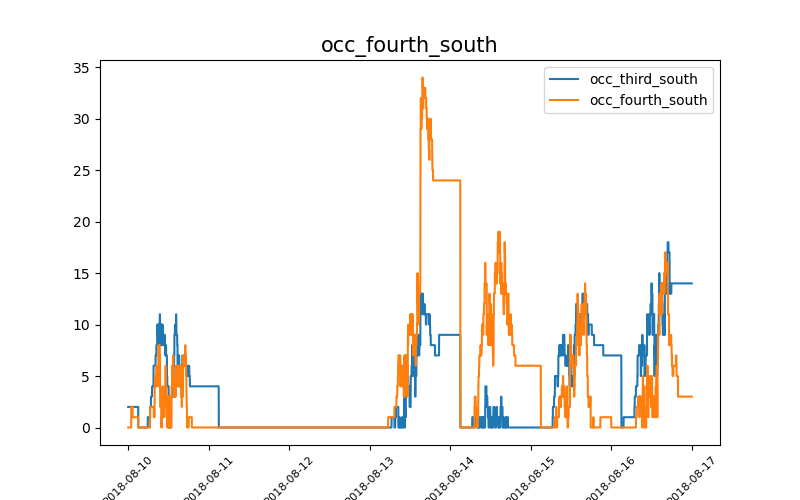

In [28]:
display.Image("images/occupancy_2018_08_10.png", width=700)

We first plotted the occupancy sensor data from the selected site shown in the above figure. It is clear to notice during weekend (08-11 and 08-12), no occupancy recorded in the building and a dramatic increase in occupancy on Monday (08-13). Also when looking closer to daily occupancy counts, we notice one valley at noon indicating lunch break in the office and two peaks indicating morning arrival and afternoon return after lunch. 

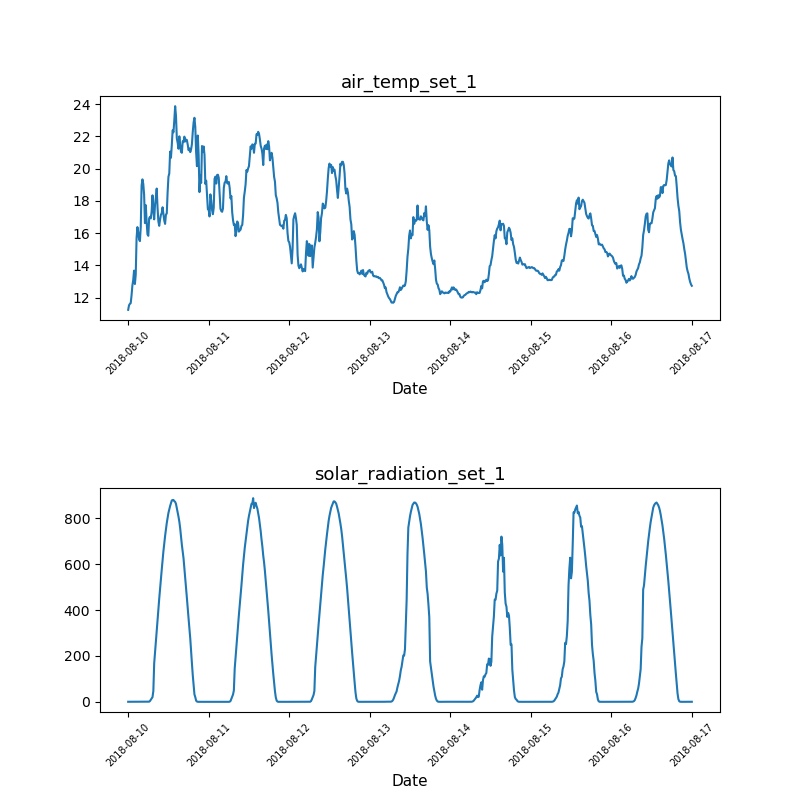

In [29]:
display.Image("images/weather_2018_08_10.png", width=700)

We also plotted the outdoor temperature within the specified time window. The recorded air temperature ranges from 12°C at night to 24°C as highest during the day, which shows rather mild climate. Another factor which could potentially influence thermal properties of the building is the solar radiation. With large areas of glazing on the facade, solar radiation may result in excessive heat gain during the day for south facing windows. We noticed that there is a noticeable decrease in temperature and solar radiation in 08-15.

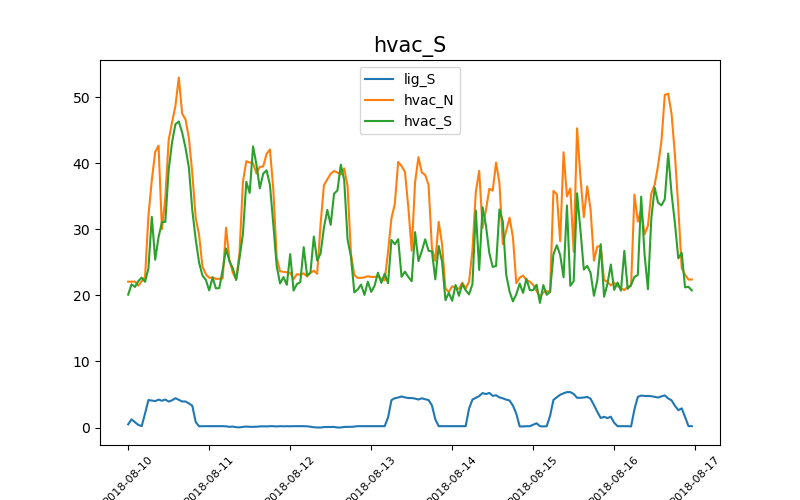

In [30]:
display.Image("images/hourly_meter_2018_08_10.png", width=700)

We first plotted the overall energy meter data of the building. In general, HVAC system in the north side tends to have higher cooling demand than the south side despite having less influence from the solar radiation. During the night, the energy consumption of those mechanical conditioning systems dropped to around 20kW, but never completely turned off. This might be due to minimum ventilation requirement even when the occupancy is low. However, it is surprising to notice that the lighting energy reduced to around 0kW during weekend but HVAC system still keeps running even when there is no occupancy, which may cause energy waste. 

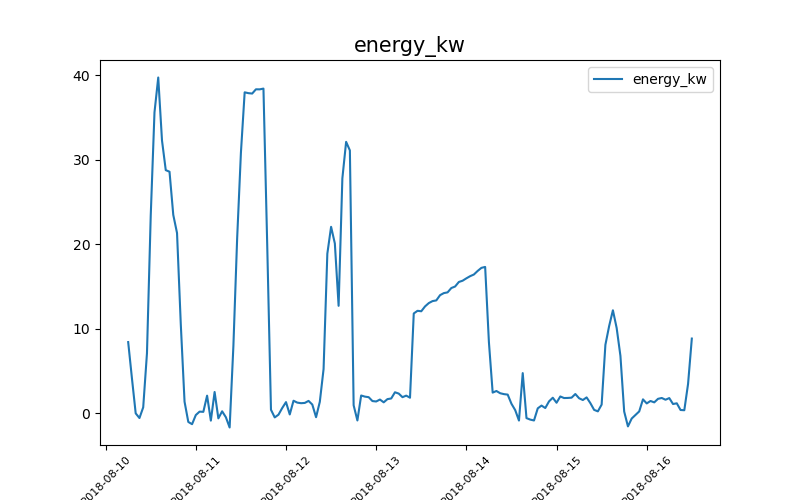

In [31]:
display.Image("images/hourly_rtu_2018_08_10.png", width=700)

The data responsible for handling cooling load are generated from the rooftop units. To approximate cooling load, we extracted mixed air temperature, supply air temperature and supply airflow rate and calculate using the following equation:

$q = c_p * \rho * (t_{mixed} - t_{supply}) * Q_{supply}$

Where $c_p$ is the specific heat capacity of air and $\rho$ is the density of the air. We calculate the $\Delta t$ from mixed and supply air temperature and multiply altogether with air volumetric flow rate $Q$ in CFM. After comparing with outdoor air, we found a correlation with the air temperature fluctuation. Especially on 08-14 and 08-15, where the low outdoor temperature result in very low cooling load of the building and as a contrary on 08-10, where the high outdoor temperature result in high cooling load. This could be explained by the availability of free cooling energy provided by the outdoor air and so the mixed air is in lower temperature.

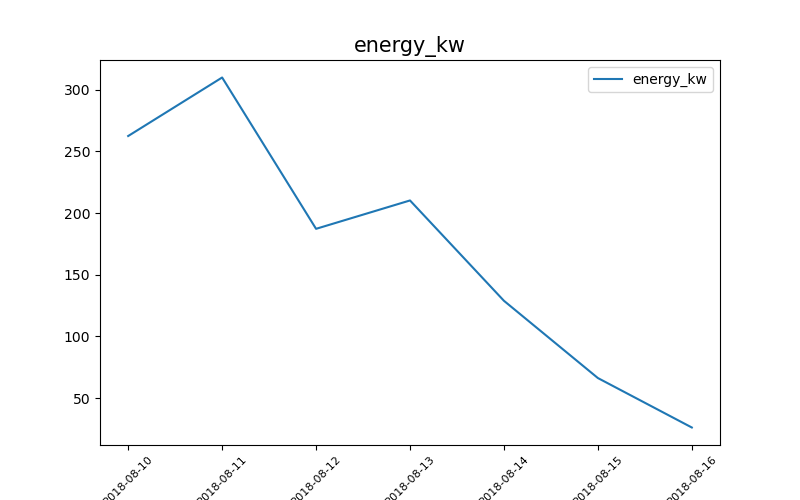

In [32]:
display.Image("images/daily_rtu_2018_08_10.png", width=700)

When we aggregate to daily energy consumption, it is shocking to see the energy consumption is high during weekend, which account for 300kW and 200kW respectively for Saturday and Sunday. This indicates a need for more advanced control logic of the mechanical system as future retrofit project.

## Author Contributions

Aoyu: Provided dataset with description, conducted energy analysis on occupancy and outdoor temperature, wrote functions in tools package

Emma: Wrote initial README, conducted C02 emission analysis, and wrote unit tests for functions

Hamsa: Wrote the introduction of the main.ipynb, created environment, binder and built JupyterBook, edited the README.md

Reuel: Wrote Makefile and conducted C02 emission vs interior temperature analysis.